## Корреляция

Посмотрим, как считать изученные коэффициенты корреляции в Python

In [45]:
# как обычно, начнем с импорта нужных библиотек
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# и зафиксируем seed
np.random.seed(123)

В файле **pressure.xls** приводятся для 15 пациентов данные о систолическом и диастолическом давлении крови непосредственно до принятия и спустя 2 часа после принятия 25 мг каптоприла. 
  
Имеется ли связь между снижением систолического и диастолического давления? Вычислите все изученные коэфиициенты корреляции и проверьте их значимость. Есть ли среди данных выбросы? 

In [4]:
# сначала импортируем данные

data = pd.read_excel('data/pressure.xls')

In [5]:
data

,СистДо,СистПосл,ДиасДо,ДиасПосл
0,210,201,130,125
1,169,165,122,121
2,187,166,124,121
3,160,157,104,106
4,167,174,112,100
5,176,145,103,85
6,185,168,121,98
7,206,180,124,105
8,173,147,115,103
9,146,136,100,98


In [6]:
DP1 = data["СистДо"] - data["СистПосл"]
DP2 = data["ДиасДо"] - data["ДиасПосл"]

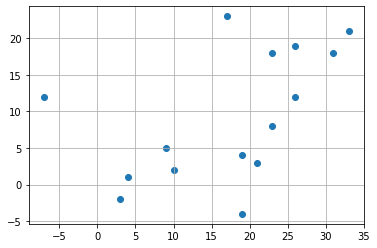

In [7]:
# посмотрим на данные

plt.scatter(DP1, DP2)
plt.grid()
plt.show()

<img src="data/pearson_corr.png" alt="Drawing" style="width: 700px;"/>

<img src="data/pearson_exp.png" alt="Drawing" style="width: 700px;"/>

Недостатки коэффициента Пирсона:
* для распределений, отличных от нормального, перестаёт быть эффективной оценкой популяционного коэффициента корреляции;
* служит мерой только линейной взаимосвязи;
* неустойчив к выбросам.


Для тех, кто уверен в себе: https://www.guessthecorrelation.com/#

### Критерий стьюдента

<img src="data/Student_krit.png" alt="Drawing" style="width: 700px;"/>


In [9]:
# коэффициент корреляции Пирсона

stats.pearsonr(DP1,DP2)

(0.49504892295474656, 0.06062278606988294)

In [21]:
x = np.random.rand(1000)*10
y = np.concatenate([x[:-1],np.array([10000])])

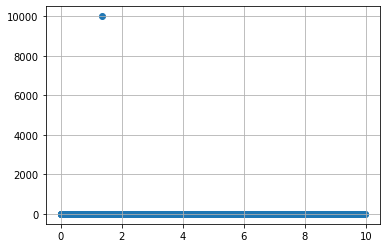

In [22]:
plt.scatter(x, y)
plt.grid()
plt.show()

In [26]:
stats.pearsonr(x,y)

(-0.0317354395404031, 0.3160731726901053)

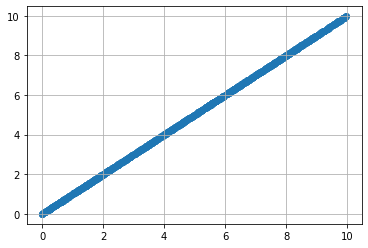

In [25]:
plt.scatter(x[:-1], y[:-1])
plt.grid()
plt.show()

In [24]:
stats.pearsonr(x[:-1],y[:-1])

(1.0, 0.0)

наблюдаем неустойчивость к выбросам

## коэффициент корреляции Спирмена

Применяем при отклонении от нормальнольности

<img src="data/spearman_corr.png" alt="Drawing" style="width: 700px;"/>
<img src="data/spearman_exp.png" alt="Drawing" style="width: 700px;"/>

### гипотеза
<img src="data/student_spear.png" alt="Drawing" style="width: 700px;"/>

In [28]:
# коэффициент корреляции Спирмена

stats.spearmanr(DP1,DP2)

SpearmanrResult(correlation=0.5560540352929466, pvalue=0.031360922746895184)

In [29]:
print(stats.spearmanr(x,y))
print(stats.spearmanr(x[:-1],y[:-1]))

SpearmanrResult(correlation=0.9954742434742434, pvalue=0.0)
SpearmanrResult(correlation=1.0, pvalue=0.0)


## Корреляция Кендала

Предпочтительнее использовать, если выборка расширяется

<img src="data/kendall_corr.png" alt="Drawing" style="width: 700px;"/>
<img src="data/kendall_exp.png" alt="Drawing" style="width: 700px;"/>

### гипотеза
<img src="data/kendall_hyp.png" alt="Drawing" style="width: 700px;"/>

Отличия от спирмана:
* менее чувствительна к большим различиям между рангами наблюдений;
* точнее оценивается по выборке небольших объёмов;
* обычно меньше по модулю.

In [33]:
# коэффициент корреляции Кендалла

stats.kendalltau(DP1,DP2)

KendalltauResult(correlation=0.4487858273467833, pvalue=0.0220031258370319)

In [34]:
print(stats.kendalltau(x,y))
print(stats.kendalltau(x[:-1],y[:-1]))

KendalltauResult(correlation=0.9965245245245246, pvalue=0.0)
KendalltauResult(correlation=1.0, pvalue=0.0)


Давайте уберем одну точку, которая нам кажется выбросом и посмотрим, что случится с коэффициентами корреляции. У этой точки отрицательные изменения в DP1.

In [35]:
data_new = data[DP1>0]

DP1_new = data_new["СистДо"] - data_new["СистПосл"]
DP2_new = data_new["ДиасДо"] - data_new["ДиасПосл"]

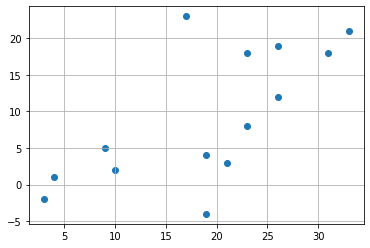

In [37]:
# еще раз посмотрим на данные

plt.scatter(DP1_new, DP2_new)
plt.grid()
plt.show()

In [38]:
print(stats.pearsonr(DP1_new,DP2_new))
print(stats.spearmanr(DP1_new,DP2_new))
print(stats.kendalltau(DP1_new,DP2_new))

(0.679798781076268, 0.0074792869569106695)
SpearmanrResult(correlation=0.6567344919942403, pvalue=0.01072757218087102)
KendalltauResult(correlation=0.550596554344981, pvalue=0.006963398309063252)


In [39]:
print(stats.pearsonr(DP1,DP2))
print(stats.spearmanr(DP1,DP2))
print(stats.kendalltau(DP1,DP2))

(0.49504892295474656, 0.06062278606988294)
SpearmanrResult(correlation=0.5560540352929466, pvalue=0.031360922746895184)
KendalltauResult(correlation=0.4487858273467833, pvalue=0.0220031258370319)


**Вывод** в этой задаче мы делаем следующий: снижение систолического и диастолического давления положительно коррелированы. И эта корреляция значима. Кроме того, мы лишний раз убедились в том, что коэффициент корреляции Пирсона подвержен сильному влиянию выбросов. 

# Успеваемость первокурсников

Для 600 первокурсников известны показатели успеваемости по четырём предметам и результаты трёх психологических тестов. Как связаны эти два набора переменных?

In [41]:
data = pd.read_csv('data/mmreg.csv',  sep=',')
data.head()


,locus_of_control,self_concept,motivation,read,write,math,science
0,-0.84,-0.24,1.00,54.8,64.5,44.5,52.6
1,-0.38,-0.47,0.67,62.7,43.7,44.7,52.6
2,0.89,0.59,0.67,60.6,56.7,70.5,58.0
3,0.71,0.28,0.67,62.7,56.7,54.7,58.0
4,-0.64,0.03,1.00,41.6,46.3,38.4,36.3


In [42]:
psych = data.loc[:, data.columns[:3]]
psych.head()

,locus_of_control,self_concept,motivation
0,-0.84,-0.24,1.00
1,-0.38,-0.47,0.67
2,0.89,0.59,0.67
3,0.71,0.28,0.67
4,-0.64,0.03,1.00


In [43]:
acad = data.loc[:, data.columns[3:]]
acad.head()

,read,write,math,science
0,54.8,64.5,44.5,52.6
1,62.7,43.7,44.7,52.6
2,60.6,56.7,70.5,58.0
3,62.7,56.7,54.7,58.0
4,41.6,46.3,38.4,36.3


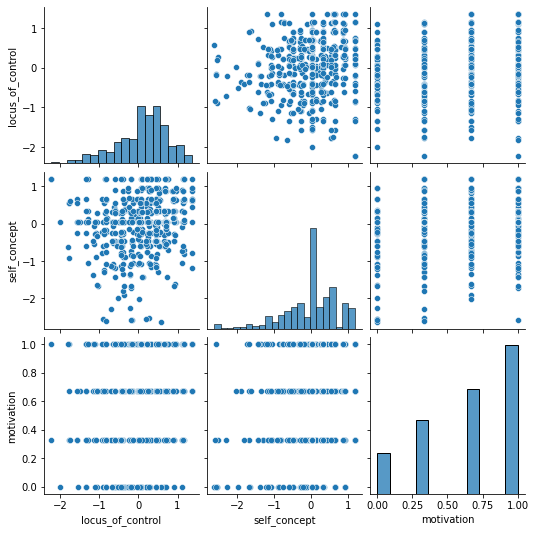

In [46]:
_ = sns.pairplot(psych)

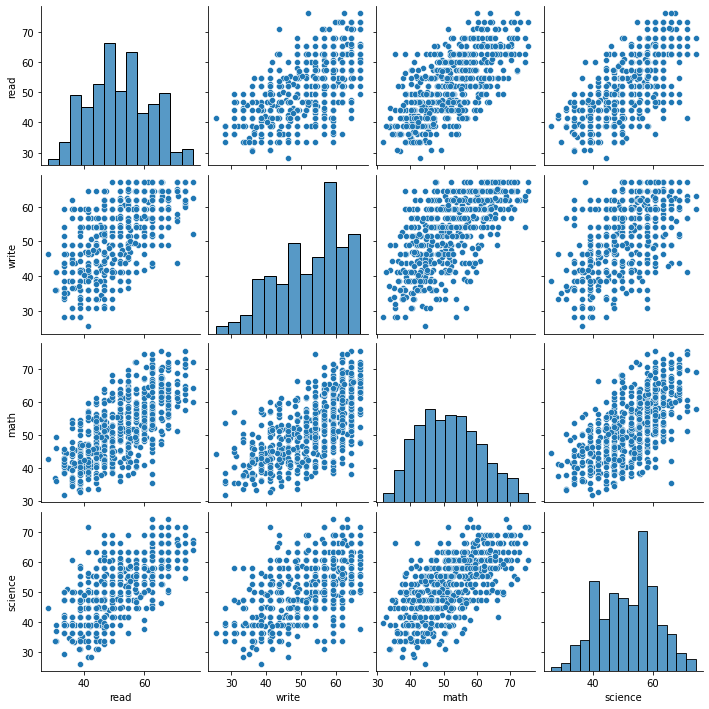

In [47]:
_ = sns.pairplot(acad)

## Попарные корреляции Пирсона:

In [48]:
np.corrcoef(acad.values.T)

array([[1.        , 0.62859089, 0.67927568, 0.69069291],
       [0.62859089, 1.        , 0.6326664 , 0.56914983],
       [0.67927568, 0.6326664 , 1.        , 0.64952612],
       [0.69069291, 0.56914983, 0.64952612, 1.        ]])

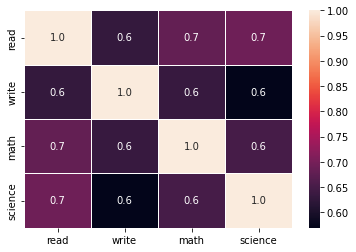

In [49]:
_ = sns.heatmap(acad.corr(),annot= True,linewidths=0.5,fmt = ".1f")


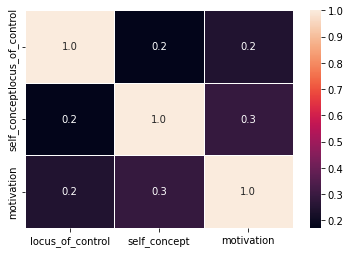

In [50]:
_ = sns.heatmap(psych.corr(), annot= True, linewidths=0.5,fmt = ".1f")

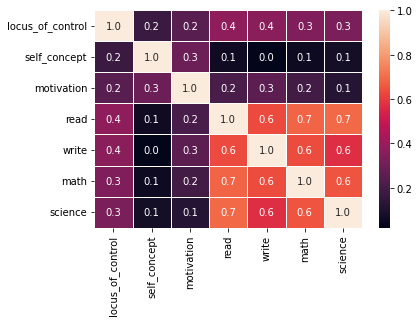

In [51]:
_ = sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f")


In [53]:
for i in range(3):
    for j in range(3,7):
        print(data.columns[i], data.columns[j], stats.pearsonr(data.loc[:, data.columns[i]], data.loc[:, data.columns[j]]))

for i in range(3):
    for j in range(3,7):
        print(data.columns[i], data.columns[j], tuple(stats.spearmanr(data.loc[:, data.columns[i]], data.loc[:, data.columns[j]])))
        

for i in range(3):
    for j in range(3,7):
        print(data.columns[i], data.columns[j], tuple(stats.kendalltau(data.loc[:, data.columns[i]], data.loc[:, data.columns[j]])))
        

locus_of_control read (0.37356504947514746, 2.627397942780776e-21)
locus_of_control write (0.3588768420819804, 1.1221310828193684e-19)
locus_of_control math (0.3372689906279467, 1.991716189030117e-17)
locus_of_control science (0.3246269370017945, 3.43272775288557e-16)
self_concept read (0.06065584275433424, 0.1378017616955153)
self_concept write (0.01944856136434241, 0.6344719269000973)
self_concept math (0.05359770276536924, 0.189832437244966)
self_concept science (0.06982633008189815, 0.08746792544962763)
motivation read (0.21060992276201443, 1.923105143899276e-07)
motivation write (0.25424817594744153, 2.633931797328235e-10)
motivation math (0.19501347444887498, 1.485623794378294e-06)
motivation science (0.11566947603763432, 0.004554941088249463)
locus_of_control read (0.3601422423341907, 8.182164140514947e-20)
locus_of_control write (0.3326876192140294, 5.674711505007227e-17)
locus_of_control math (0.3225522195783023, 5.408667273460768e-16)
locus_of_control science (0.3215329829066

### correlation vs causation

<img src="data/correlation-vs-causation-phone-RAM1.png.webp" alt="Drawing" style="width: 700px;"/>

https://www.tylervigen.com/spurious-correlations

<img src="data/chart.jpeg" alt="Drawing" style="width: 700px;"/>

https://www.research.autodesk.com/app/uploads/2023/03/same-stats-different-graphs.pdf_rec2hRjLLGgM7Cn2T.pdf

<img src="data/DinoSequential-1.gif" alt="Drawing" style="width: 700px;"/>
